In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt


In [37]:
import os
os.environ['KAGGLE_USERNAME']='sifaw99'
os.environ['KAGGLE_KEY']='aa58ac173f7e147ae1d452e179c2d2c0'


In [3]:
! kaggle datasets download -d prithwirajmitra/covid-face-mask-detection-dataset

100%|█████████████████████████████████████████| 207M/207M [08:36<00:00, 484kB/s]
100%|█████████████████████████████████████████| 207M/207M [08:36<00:00, 420kB/s]


In [4]:
! unzip covid-face-mask-detection-dataset.zip

Archive:  covid-face-mask-detection-dataset.zip
  inflating: New Masks Dataset/Test/Mask/2070.jpg  
  inflating: New Masks Dataset/Test/Mask/2072.jpg  
  inflating: New Masks Dataset/Test/Mask/2083.jpg  
  inflating: New Masks Dataset/Test/Mask/2085.jpg  
  inflating: New Masks Dataset/Test/Mask/2086.jpg  
  inflating: New Masks Dataset/Test/Mask/2110.jpg  
  inflating: New Masks Dataset/Test/Mask/2113.jpg  
  inflating: New Masks Dataset/Test/Mask/2114.jpeg  
  inflating: New Masks Dataset/Test/Mask/2130.jpg  
  inflating: New Masks Dataset/Test/Mask/2132.jpg  
  inflating: New Masks Dataset/Test/Mask/2135.jpg  
  inflating: New Masks Dataset/Test/Mask/2154.png  
  inflating: New Masks Dataset/Test/Mask/2158.png  
  inflating: New Masks Dataset/Test/Mask/2159.png  
  inflating: New Masks Dataset/Test/Mask/2160.png  
  inflating: New Masks Dataset/Test/Mask/2170.png  
  inflating: New Masks Dataset/Test/Mask/2172.png  
  inflating: New Masks Dataset/Test/Mask/2173.png  
  inflating: Ne

  inflating: New Masks Dataset/Train/Mask/0376.png  
  inflating: New Masks Dataset/Train/Mask/0384.jpg  
  inflating: New Masks Dataset/Train/Mask/0385.jpg  
  inflating: New Masks Dataset/Train/Mask/0387.png  
  inflating: New Masks Dataset/Train/Mask/0414.jpg  
  inflating: New Masks Dataset/Train/Mask/0415.jpg  
  inflating: New Masks Dataset/Train/Mask/0417.jpg  
  inflating: New Masks Dataset/Train/Mask/0418.jpg  
  inflating: New Masks Dataset/Train/Mask/0420.jpeg  
  inflating: New Masks Dataset/Train/Mask/0421.jpg  
  inflating: New Masks Dataset/Train/Mask/0427.jpg  
  inflating: New Masks Dataset/Train/Mask/0451.jpg  
  inflating: New Masks Dataset/Train/Mask/0466.jpg  
  inflating: New Masks Dataset/Train/Mask/0469.jpg  
  inflating: New Masks Dataset/Train/Mask/0470.jpg  
  inflating: New Masks Dataset/Train/Mask/0481.jpg  
  inflating: New Masks Dataset/Train/Mask/0482.jpg  
  inflating: New Masks Dataset/Train/Mask/0486.jpg  
  inflating: New Masks Dataset/Train/Mask/048

  inflating: New Masks Dataset/Train/Mask/1369.jpg  
  inflating: New Masks Dataset/Train/Mask/1378.jpg  
  inflating: New Masks Dataset/Train/Mask/1383.jpg  
  inflating: New Masks Dataset/Train/Mask/1394.jpg  
  inflating: New Masks Dataset/Train/Mask/1405.jpg  
  inflating: New Masks Dataset/Train/Mask/1406.jpg  
  inflating: New Masks Dataset/Train/Mask/1409.jpg  
  inflating: New Masks Dataset/Train/Mask/1430.jpg  
  inflating: New Masks Dataset/Train/Mask/1453.jpg  
  inflating: New Masks Dataset/Train/Mask/1455.jpg  
  inflating: New Masks Dataset/Train/Mask/1456.jpg  
  inflating: New Masks Dataset/Train/Mask/1462.jpg  
  inflating: New Masks Dataset/Train/Mask/1471.jpg  
  inflating: New Masks Dataset/Train/Mask/1473.jpg  
  inflating: New Masks Dataset/Train/Mask/1486.jpg  
  inflating: New Masks Dataset/Train/Mask/1487.jpg  
  inflating: New Masks Dataset/Train/Mask/1488.jpg  
  inflating: New Masks Dataset/Train/Mask/1490.jpg  
  inflating: New Masks Dataset/Train/Mask/1491

  inflating: New Masks Dataset/Train/Non Mask/215.jpg  
  inflating: New Masks Dataset/Train/Non Mask/216.jpg  
  inflating: New Masks Dataset/Train/Non Mask/217.jpg  
  inflating: New Masks Dataset/Train/Non Mask/218.jpg  
  inflating: New Masks Dataset/Train/Non Mask/22.jpg  
  inflating: New Masks Dataset/Train/Non Mask/220.jpg  
  inflating: New Masks Dataset/Train/Non Mask/221.jpg  
  inflating: New Masks Dataset/Train/Non Mask/222.jpg  
  inflating: New Masks Dataset/Train/Non Mask/223.jpg  
  inflating: New Masks Dataset/Train/Non Mask/224.jpg  
  inflating: New Masks Dataset/Train/Non Mask/225.jpg  
  inflating: New Masks Dataset/Train/Non Mask/226.jpg  
  inflating: New Masks Dataset/Train/Non Mask/227.jpg  
  inflating: New Masks Dataset/Train/Non Mask/228.jpg  
  inflating: New Masks Dataset/Train/Non Mask/229.jpg  
  inflating: New Masks Dataset/Train/Non Mask/23.jpg  
  inflating: New Masks Dataset/Train/Non Mask/230.jpg  
  inflating: New Masks Dataset/Train/Non Mask/231.

  inflating: New Masks Dataset/Validation/Mask/1773.jpg  
  inflating: New Masks Dataset/Validation/Mask/1779.jpeg  
  inflating: New Masks Dataset/Validation/Mask/1793.jpg  
  inflating: New Masks Dataset/Validation/Mask/1794.jpg  
  inflating: New Masks Dataset/Validation/Mask/1797.jpg  
  inflating: New Masks Dataset/Validation/Mask/1802.jpg  
  inflating: New Masks Dataset/Validation/Mask/1803.jpg  
  inflating: New Masks Dataset/Validation/Mask/1804.jpg  
  inflating: New Masks Dataset/Validation/Mask/1818.jpg  
  inflating: New Masks Dataset/Validation/Mask/1828.jpg  
  inflating: New Masks Dataset/Validation/Mask/1829.jpg  
  inflating: New Masks Dataset/Validation/Mask/1841.jpg  
  inflating: New Masks Dataset/Validation/Mask/1843.jpg  
  inflating: New Masks Dataset/Validation/Mask/1845.jpg  
  inflating: New Masks Dataset/Validation/Mask/1848.jpg  
  inflating: New Masks Dataset/Validation/Mask/1874.jpg  
  inflating: New Masks Dataset/Validation/Mask/1876.jpg  
  inflating: 

  inflating: New Masks Dataset/Validation/Mask/6428.png  
  inflating: New Masks Dataset/Validation/Mask/6430.png  
  inflating: New Masks Dataset/Validation/Mask/6434.jpg  
  inflating: New Masks Dataset/Validation/Non Mask/real_00001.jpg  
  inflating: New Masks Dataset/Validation/Non Mask/real_00002.jpg  
  inflating: New Masks Dataset/Validation/Non Mask/real_00003.jpg  
  inflating: New Masks Dataset/Validation/Non Mask/real_00004.jpg  
  inflating: New Masks Dataset/Validation/Non Mask/real_00005.jpg  
  inflating: New Masks Dataset/Validation/Non Mask/real_00006.jpg  
  inflating: New Masks Dataset/Validation/Non Mask/real_00007.jpg  
  inflating: New Masks Dataset/Validation/Non Mask/real_00008.jpg  
  inflating: New Masks Dataset/Validation/Non Mask/real_00009.jpg  
  inflating: New Masks Dataset/Validation/Non Mask/real_00010.jpg  
  inflating: New Masks Dataset/Validation/Non Mask/real_00011.jpg  
  inflating: New Masks Dataset/Validation/Non Mask/real_00012.jpg  
  inflatin

In [59]:
main_dir = 'New Masks Dataset'
train_dir = os.path.join(main_dir,'Train')
test_dir = os.path.join(main_dir,'Test')
valid_dir = os.path.join(main_dir,'Validation')

train_mask_dir = os.path.join(train_dir,'Mask')
train_nomask_dir = os.path.join(train_dir,'Non Mask')

In [60]:
train_mask_names = os.listdir(train_mask_dir)
print(train_mask_names[:10])

train_nomask_names = os.listdir(train_nomask_dir)
print(train_nomask_names[:10])

['0558.jpg', '0901.jpeg', '1455.jpg', '0773.jpg', '0200.jpg', '1523.jpg', '0247.jpg', '1456.jpg', '1383.jpg', '1530.jpg']
['302.jpg', '265.jpg', '181.jpg', '30.jpg', '145.jpg', '111.jpg', '307.jpg', '309.jpg', '335.jpg', '213.jpg']


In [61]:
import matplotlib.image as mpimg
nrows = 4
ncols = 4

plt.figure(figsize=(12,12))

mask_pic =[]
for i in train_mask_names[0:8]:
  mask_pic.append(os.path.join(train_mask_dir,i))

nomask_pic= []
for i in train_nomask_names[0:8]:
  nomask_pic.append(os.path.join(train_nomask_dir,i))  

print(mask_pic)
print(nomask_pic)

merged_list = mask_pic+nomask_pic

for i in range(0,len(merged_list)):
  data = merged_list[i].split('/',4)[4]
  sp = plt.subplot(nrows,ncols,i+1)
  sp.axis('Off')
  image = mpimg.imread(merged_list[i])
  sp.set_title(data,fontsize=10)
  plt.imshow(image,cmap='gray')
  
  plt.show()

['New Masks Dataset/Train/Mask/0558.jpg', 'New Masks Dataset/Train/Mask/0901.jpeg', 'New Masks Dataset/Train/Mask/1455.jpg', 'New Masks Dataset/Train/Mask/0773.jpg', 'New Masks Dataset/Train/Mask/0200.jpg', 'New Masks Dataset/Train/Mask/1523.jpg', 'New Masks Dataset/Train/Mask/0247.jpg', 'New Masks Dataset/Train/Mask/1456.jpg']
['New Masks Dataset/Train/Non Mask/302.jpg', 'New Masks Dataset/Train/Non Mask/265.jpg', 'New Masks Dataset/Train/Non Mask/181.jpg', 'New Masks Dataset/Train/Non Mask/30.jpg', 'New Masks Dataset/Train/Non Mask/145.jpg', 'New Masks Dataset/Train/Non Mask/111.jpg', 'New Masks Dataset/Train/Non Mask/307.jpg', 'New Masks Dataset/Train/Non Mask/309.jpg']


IndexError: list index out of range

<Figure size 864x864 with 0 Axes>

In [62]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   zoom_range = 0.2,
                                   rotation_range = 40,
                                   horizontal_flip =True
                                   )

test_datagen = ImageDataGenerator(rescale=1./255)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150,150),
                                                    batch_size = 32,
                                                    class_mode ='binary' 
                                                    )

test_generator = test_datagen.flow_from_directory(test_dir,
                                                    target_size=(150,150),
                                                    batch_size = 32,
                                                    class_mode ='binary' 
                                                    )

valid_generator = validation_datagen.flow_from_directory(valid_dir,
                                                    target_size=(150,150),
                                                    batch_size = 32,
                                                    class_mode ='binary' 
                                                    )

Found 600 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Found 306 images belonging to 2 classes.


In [63]:
train_generator.class_indices

{'Mask': 0, 'Non Mask': 1}

In [64]:
train_generator.image_shape

(150, 150, 3)

In [65]:
model = Sequential()
model.add(Conv2D(32,(3,3),padding='SAME',activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(64,(3,3),padding='SAME',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 37, 37, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 87616)             0

In [66]:
model.compile(Adam(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [67]:
history = model.fit(train_generator,
                    epochs = 30,
                    validation_data = valid_generator)

Epoch 1/30
19/19 [==============================] - 73s 3s/step - loss: 7.7744 - accuracy: 0.5180 - val_loss: 0.6924 - val_accuracy: 0.5000
Epoch 2/30
19/19 [==============================] - 40s 2s/step - loss: 0.7119 - accuracy: 0.5205 - val_loss: 0.6775 - val_accuracy: 0.5065
Epoch 3/30
19/19 [==============================] - 32s 2s/step - loss: 0.5841 - accuracy: 0.6952 - val_loss: 0.5874 - val_accuracy: 0.7810
Epoch 4/30
19/19 [==============================] - 29s 1s/step - loss: 0.4222 - accuracy: 0.8139 - val_loss: 0.4536 - val_accuracy: 0.8268
Epoch 5/30
19/19 [==============================] - 28s 1s/step - loss: 0.3597 - accuracy: 0.8657 - val_loss: 0.4192 - val_accuracy: 0.8203
Epoch 6/30
19/19 [==============================] - 28s 1s/step - loss: 0.3753 - accuracy: 0.8382 - val_loss: 0.2813 - val_accuracy: 0.9314
Epoch 7/30
19/19 [==============================] - 28s 1s/step - loss: 0.3103 - accuracy: 0.8960 - val_loss: 0.3069 - val_accuracy: 0.9216
Epoch 8/30
19/19 [==

In [68]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 0, 'poch')

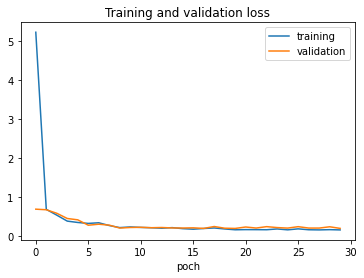

In [69]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('Training and validation loss')
plt.xlabel('poch')


Text(0.5, 0, 'poch')

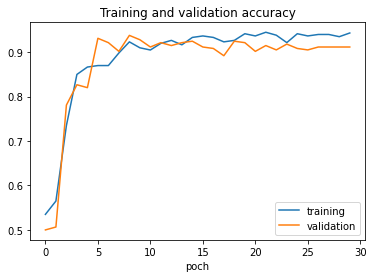

In [70]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Training and validation accuracy')
plt.xlabel('poch')

In [71]:
test_loss, test_acc = model.evaluate(test_generator)
print('test loss:{} test acc:{}'.format(test_loss,test_acc))

4/4 [==============================] - 3s 765ms/step - loss: 0.1447 - accuracy: 0.9400
test loss:0.14474137127399445 test acc:0.9399999976158142


In [ ]:
from google.colab import files
from keras.preprocessing import image
uploaded = files.upload()
for fname in uploaded.keys():
  img_path = 'content/'+fname
  img = image.load_img(img_path,target_size=(150,150))
  images = image.img_to_array(img)
  images = np.expand_dims(images,axis=0)
  prediction = model.predict(images)
  print(fname)
  if prediction == 0:
    print('Mask')
  else:
    print('No Mask')  


In [ ]:
model.save('model.h5')